# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('main_task_new.csv')
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [4]:
df['Rating'].value_counts()

4.0    13692
4.5    10929
3.5     6824
5.0     3879
3.0     2955
2.5      915
2.0      466
1.0      201
1.5      139
Name: Rating, dtype: int64

# City

In [5]:
df_city = pd.DataFrame(columns = ['city','cnt','rating_avg'])

for city in df['City'].unique():
    df_city = df_city.append(pd.DataFrame([[city, 
                                            df[df['City'].str.contains(city)]['Rating'].count(), 
                                            df[df['City'].str.contains(city)]['Rating'].mean()]],
                                         columns = ['city','cnt','rating_avg']), ignore_index = True)
df_city = df_city.sort_values('rating_avg', ascending = False).reset_index().drop('index', axis = 1)

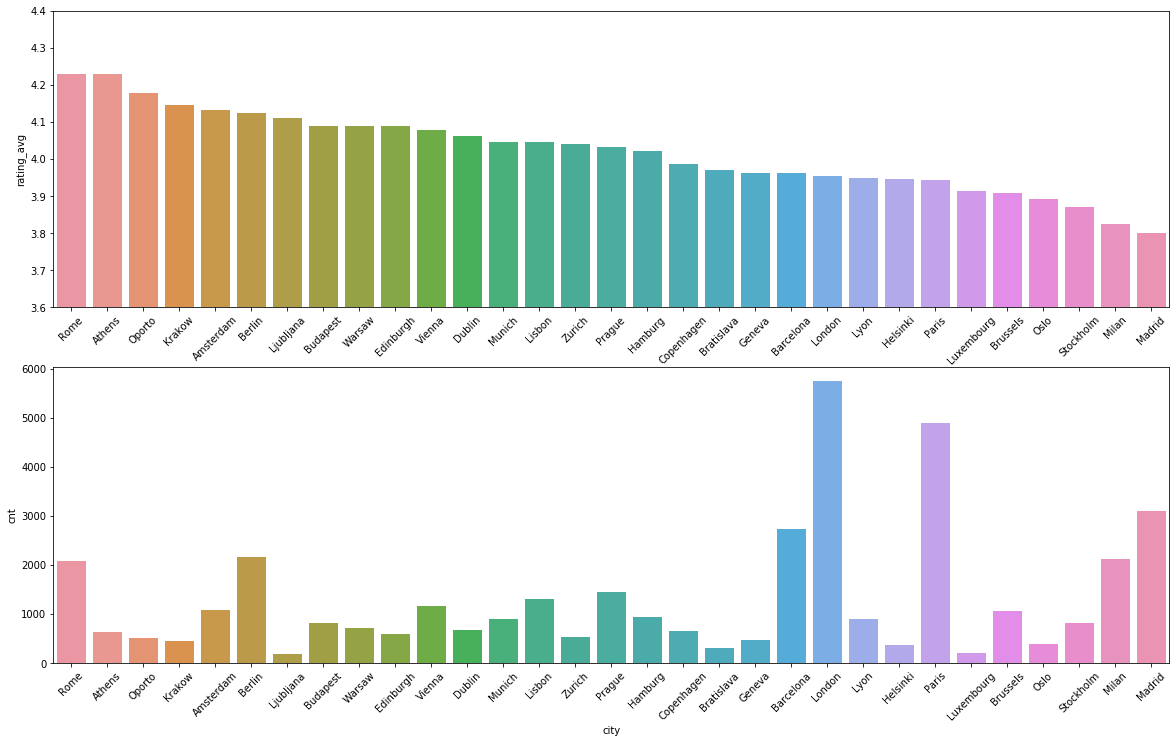

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (20, 12))
s = sns.barplot(ax = ax1, x = 'city', y = 'rating_avg', data = df_city)
s.set_xticklabels(s.get_xticklabels(), rotation = 45)
s.set(ylim=(3.6, 4.4))
s = sns.barplot(ax = ax2, x = 'city', y = 'cnt', data = df_city)
s.set_xticklabels(s.get_xticklabels(), rotation = 45);

In [7]:
# Так как наша модель не регрессионная, то не имеет значения дельта рейтинга между городами,
# достаточно ограничиться последовательностью и пронумеровать города по убыванию среднего рейтинга
df_city['city_rating'] = df_city.index
df = df.merge(df_city[['city','city_rating']], left_on = 'City', right_on = 'city', how = 'left').drop('city', axis = 1)
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,city_rating
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,24
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,28
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,21
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,5
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,12


# Cuisine

In [8]:
df['Cuisine Style'].fillna('Empty', inplace = True)

In [9]:
df['Cuisine Style'] = df['Cuisine Style'].str.replace("'","")
df['Cuisine Style'] = df['Cuisine Style'].str.replace("[","")
df['Cuisine Style'] = df['Cuisine Style'].str.replace("]","")

In [10]:
df['cuisine_cnt'] = df['Cuisine Style']
cuisines = {}
for i in range(df.shape[0]):
    cuisines_list = df['Cuisine Style'].iloc[i].split(', ')
    if df['Cuisine Style'].iloc[i] == 'Empty':
        df['cuisine_cnt'].iloc[i] = 0
    else:
        df['cuisine_cnt'].iloc[i] = len(cuisines_list)
    for cuisine in cuisines_list:
        if cuisine not in cuisines.keys():
            cuisines[cuisine] = 1
        else:
            cuisines[cuisine] += 1
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,city_rating,cuisine_cnt
0,id_5569,Paris,"European, French, International",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,24,3
1,id_1535,Stockholm,Empty,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,28,0
2,id_352,London,"Japanese, Sushi, Asian, Grill, Vegetarian Frie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,21,7
3,id_3456,Berlin,Empty,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,5,0
4,id_615,Munich,"German, Central European, Vegetarian Friendly",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,12,3


In [11]:
df['cuisine_cnt'].value_counts()

0     9283
1     7264
2     6294
3     5306
4     4799
5     3606
6     2043
7     1022
8      283
9       76
10      19
11       3
21       1
13       1
Name: cuisine_cnt, dtype: int64

In [12]:
# удалим рестораны, у которых больше 10 видов кухни
df = df.loc[df['cuisine_cnt']<=10]

In [13]:
df_cuisine_cnt = df[['cuisine_cnt','Rating']].groupby(['cuisine_cnt'], as_index = False).mean()
df_cuisine_cnt

,cuisine_cnt,Rating
0,0,3.946515
1,1,3.916575
2,2,3.954719
3,3,3.969940
4,4,4.040529
5,5,4.113838
6,6,4.170338
7,7,4.215753
8,8,4.265018
9,9,4.210526


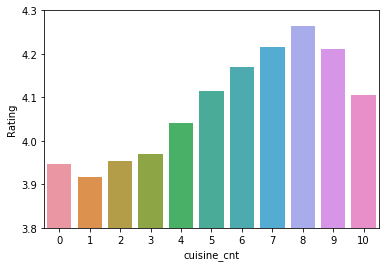

In [14]:
fig, ax = plt.subplots()
s = sns.barplot(ax = ax, x = 'cuisine_cnt', y = 'Rating', data = df_cuisine_cnt)
s.set(ylim=(3.8, 4.3));

In [15]:
# средний рейтинг растет с ростом числа видов кухни до 8, далее видим снижение
# кол-во ресторанов с 9 и 10 видами кухни незначительно, удалим их тоже
# для нашей модели не будет критичным более высокий рейтинг ресторанов, где не указана кухня
# как фичу оставим количество видов кухни
df = df.loc[df['cuisine_cnt']<=8]

# Ranking

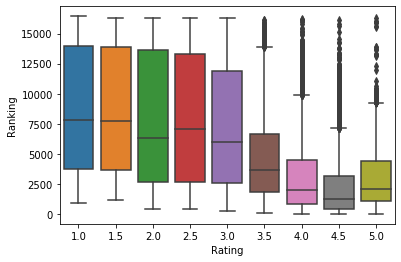

In [16]:
sns.boxplot(x = 'Rating', y = 'Ranking', data = df)

In [17]:
# Можем заметить, что чем выше рейтинг, тем ниже ranking
# Оставим как фичу

# Price Range

In [18]:
df['Price Range'].fillna('Empty', inplace = True)

In [19]:
df['Price Range'].unique()

array(['$$ - $$$', 'Empty', '$$$$', '$'], dtype=object)

In [20]:
df.loc[df['Price Range'] == 'Empty', 'Price'] = 0
df.loc[df['Price Range'] == '$', 'Price'] = 1
df.loc[df['Price Range'] == '$$ - $$$', 'Price'] = 2
df.loc[df['Price Range'] == '$$$$', 'Price'] = 3

In [21]:
df_pr = df[['Price','Rating']].groupby(['Price'], as_index = False).mean()
df_pr.sort_values('Rating', inplace = True)
df_pr.reset_index(inplace = True)
df_pr.drop('index', axis = 1, inplace = True)
df_pr['pr_rating'] = df_pr.index

In [22]:
df_pr

,Price,Rating,pr_rating
0,0.0,3.933854,0
1,2.0,3.986526,1
2,1.0,4.092099,2
3,3.0,4.204658,3


In [25]:
df = df.merge(df_pr[['Price','pr_rating']], left_on = 'Price', right_on = 'Price', how = 'left')

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,city_rating,cuisine_cnt,Price,pr_rating
0,id_5569,Paris,"European, French, International",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,24,3,2.0,1
1,id_1535,Stockholm,Empty,1537.0,4.0,Empty,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,28,0,0.0,0
2,id_352,London,"Japanese, Sushi, Asian, Grill, Vegetarian Frie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,21,7,3.0,3
3,id_3456,Berlin,Empty,3458.0,5.0,Empty,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,5,0,0.0,0
4,id_615,Munich,"German, Central European, Vegetarian Friendly",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,12,3,2.0,1


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [44]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df[['city_rating','cuisine_cnt','Ranking','Price','pr_rating']]
y = df['Rating']

In [45]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [46]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [47]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [48]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [49]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.30328721804511277
